# **Yes Bank stock closing price prediction**

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1** - Ruchit


# **Problem Statement**

 Yes Bank, an Indian financial institution, has faced scrutiny due to a fraud case involving Rana Kapoor since 2018. This has sparked interest in examining how this incident affected the company's stock prices. The dataset includes monthly stock data since the bank's inception, encompassing opening, closing, high, and low prices. The primary aim is to forecast the stock's closing price each month.

# **GitHub Link -**  https://github.com/ruchit2005/YES-Bank-stock-prediction.git

### **Project Overview**

This project focuses on predicting the monthly **closing stock prices of Yes Bank**, one of India’s prominent financial institutions, using multiple machine learning regression models. The motivation behind this study stems from the bank’s financial instability, especially after the 2018 fraud case involving former CEO Rana Kapoor. This scandal significantly impacted investor sentiment and stock trends, prompting interest in analyzing and forecasting the bank’s stock behavior using historical data.

The dataset used for this project contains monthly historical stock prices of Yes Bank, with columns for **Open**, **High**, **Low**, and **Close** prices. Additionally, each row includes a date entry in “mm-yy” format. Since this format isn’t directly usable in regression models, the date was converted into two separate numerical features: **month** and **year**. All features in the dataset were numeric, and no missing values were found, which made preprocessing straightforward.

The target variable for prediction was the **closing price**. The dataset was divided into an 80:20 ratio for training and testing. To model the data and make predictions, four different machine learning regression models were implemented:

1. **Linear Regression**: A basic model that assumes a straight-line relationship between input features and the target. It serves as a foundational benchmark.
2. **Ridge Regression**: A regularized version of linear regression that applies an L2 penalty to reduce the impact of multicollinearity and overfitting.
3. **Random Forest Regressor**: A powerful ensemble model that builds multiple decision trees and averages their results. It’s robust to noise and non-linearity in the data.
4. **Support Vector Regressor (SVR)**: A model that fits the best line within a margin of tolerance and is particularly effective when dealing with outliers and non-linear patterns.

The performance of these models was evaluated using three key metrics:

* **R² Score**: Represents how well the model’s predictions approximate the actual outcomes. A higher score indicates better performance.
* **Mean Absolute Error (MAE)**: Captures the average absolute differences between predicted and actual values.
* **Mean Squared Error (MSE)**: Reflects the average squared differences, penalizing larger errors more heavily.

The results showed that while all models had similar R² scores, the **SVR model stood out** by achieving the **lowest MAE and MSE**. This indicates that SVR was the most accurate in minimizing prediction errors and closely tracked the actual closing prices.

To provide a visual interpretation of the models’ performance, the project includes:

* Individual **line plots** comparing actual vs. predicted values for each model.
* A combined **line graph** showing predictions from all models against the actual values for holistic comparison.
* A **bar chart** summarizing MAE, MSE, and R² scores across all models to support visual evaluation.

In summary, this project demonstrates the effectiveness of machine learning regression models in **forecasting stock prices**. It highlights the importance of proper feature engineering, data cleaning, and model evaluation when working with real-world time-series data. Among the models tested, **Support Vector Regression** emerged as the most reliable approach for predicting Yes Bank’s monthly closing prices, proving its value in financial forecasting tasks.




In [19]:
#Libraries Used :

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
#Scanning the data

file_url = f'https://raw.githubusercontent.com/ruchit2005/YES-Bank-stock-prediction/refs/heads/main/data_YesBank_StockPrices.csv'
doc = pd.read_csv(file_url)

doc.head()


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [21]:
doc.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [22]:
#Check for NA or missing data

doc.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [23]:
# The data is in the form mm-yy which is not significant to the model, so we will split it into two columns
doc['Date'] = pd.to_datetime(doc['Date'], format='%b-%y')
doc['Year'] = doc['Date'].dt.year
doc['Month'] = doc['Date'].dt.month
doc.drop(columns=['Date'], inplace=True)
doc

,Open,High,Low,Close,Year,Month
0,13.00,14.00,11.25,12.46,2005,7
1,12.58,14.88,12.55,13.42,2005,8
2,13.48,14.87,12.27,13.30,2005,9
3,13.20,14.47,12.40,12.99,2005,10
4,13.35,13.88,12.88,13.41,2005,11
...,...,...,...,...,...,...
180,25.60,28.30,11.10,11.95,2020,7
181,12.00,17.16,11.85,14.37,2020,8
182,14.30,15.34,12.75,13.15,2020,9
183,13.30,14.01,12.11,12.42,2020,10


In [24]:
# Since all our data is numerical, we can don't need to one-hot encode any categorical variables.
# Splitting the data

target = 'Close'
Categorical = ['Open', 'High', 'Low', 'Month', 'Year']

x = doc[Categorical]
y = doc[target]


ind = len(x)*0.8
x_train, x_test = x[:int(ind)], x[int(ind):]
y_train, y_test = y[:int(ind)], y[int(ind):]



## Models used
In our project we have used 4 models to correctly predict the closing stock prices at the end of the month. The models used are:

1. Linear Regressor
2. Ridge
3. RandomForestRegressor
4. SVR

We have selected the models to be used from ther guide provided by scikit-learn's documents : https://scikit-learn.org/1.3/tutorial/machine_learning_map/

### Model 1: Linear Regressor

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [26]:
model.score(x_test, y_test)

0.984341518836484

In [27]:
# Analysing the output

pred1 = model.predict(x_test)
mae1 = mean_absolute_error(y_test, pred1)
mse1 = mean_squared_error(y_test, pred1)
print("MAE:", mae1)
print("MSE:", mse1)


MAE: 10.608732187763408
MSE: 257.09624573654236


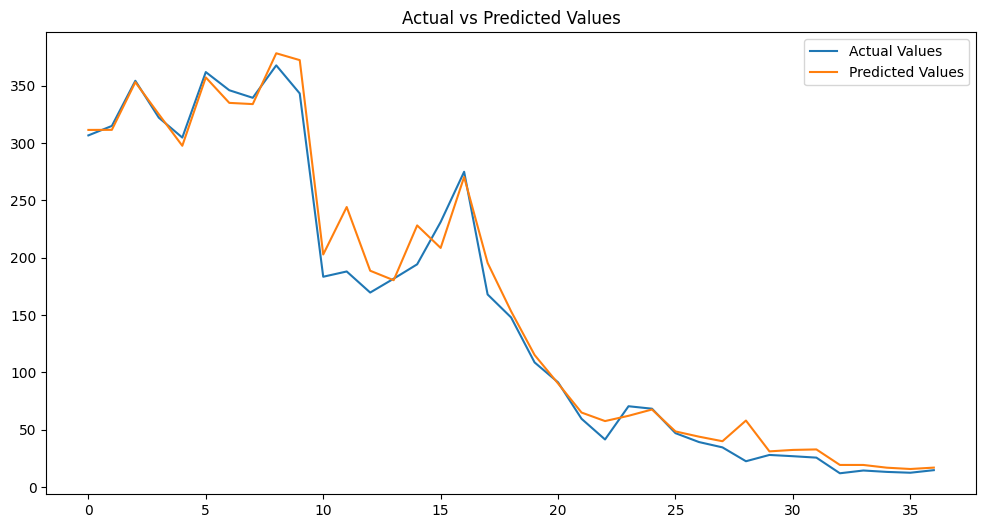

In [28]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Values')
plt.plot(pred1, label='Predicted Values')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()

### Model 2: Ridge

In [29]:
from sklearn.linear_model import Ridge
model2 = Ridge(alpha=0.5)
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.9843420103966685

In [30]:
# Analysing the output

pred2 = model2.predict(x_test)
mae2 = mean_absolute_error(y_test, pred2)
mse2 = mean_squared_error(y_test, pred2)
print("MAE:", mae2)
print("MSE:", mse2)

MAE: 10.608466593057182
MSE: 257.0881748210643


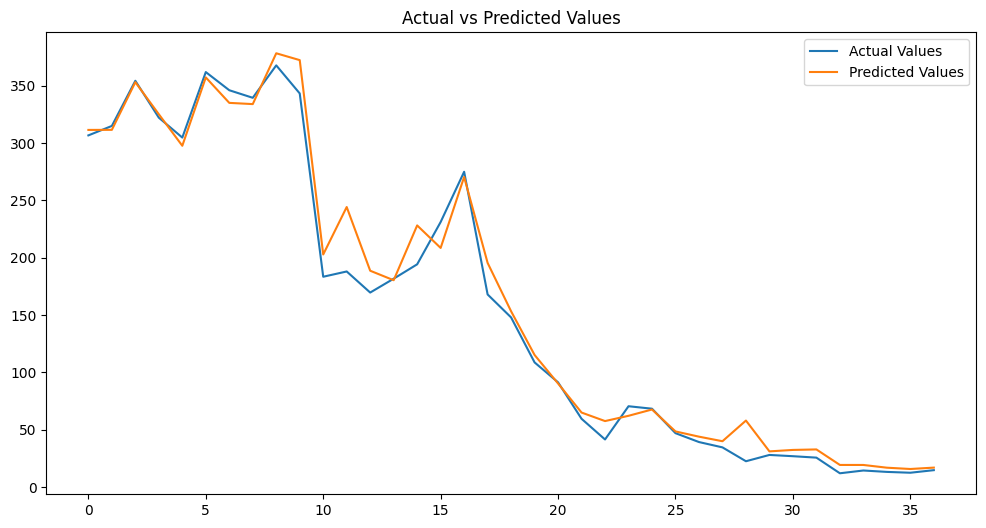

In [31]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Values')
plt.plot(pred2, label='Predicted Values')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()

### Model 3: RandomForestRegressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(n_estimators=100, random_state=42)
model3.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
model3.score(x_test, y_test)

0.9661758869409532

In [34]:
# Analysing the output

pred3 = model3.predict(x_test)
mae3 = mean_absolute_error(y_test, pred3)
mse3 = mean_squared_error(y_test, pred3)
print("MAE:", mae3)
print("MSE:", mse3)


MAE: 14.961464864864828
MSE: 555.3573422632406


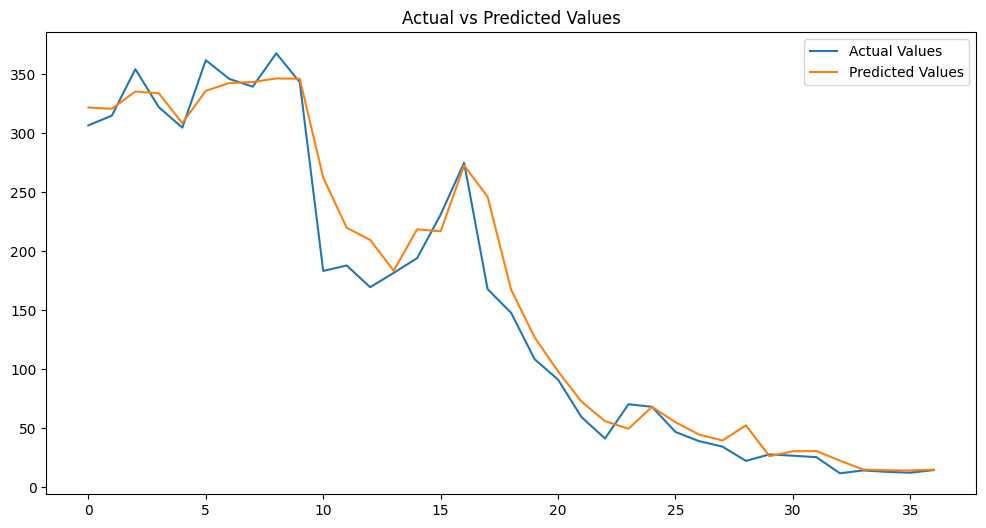

In [35]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Values')
plt.plot(pred3, label='Predicted Values')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()

### Model 4: SVR

In [36]:
from sklearn.svm import SVR
model4 = SVR(kernel='linear')
model4.fit(x_train, y_train)


SVR(kernel='linear')

In [37]:
model4.score(x_test, y_test)

0.9848740068172164

In [38]:
# Analysing the output

pred4 = model4.predict(x_test)
mae4 = mean_absolute_error(y_test, pred4)
mse4 = mean_squared_error(y_test, pred4)
print("MAE:", mae4)
print("MSE:", mse4)


MAE: 9.143842765195007
MSE: 248.35333770373026


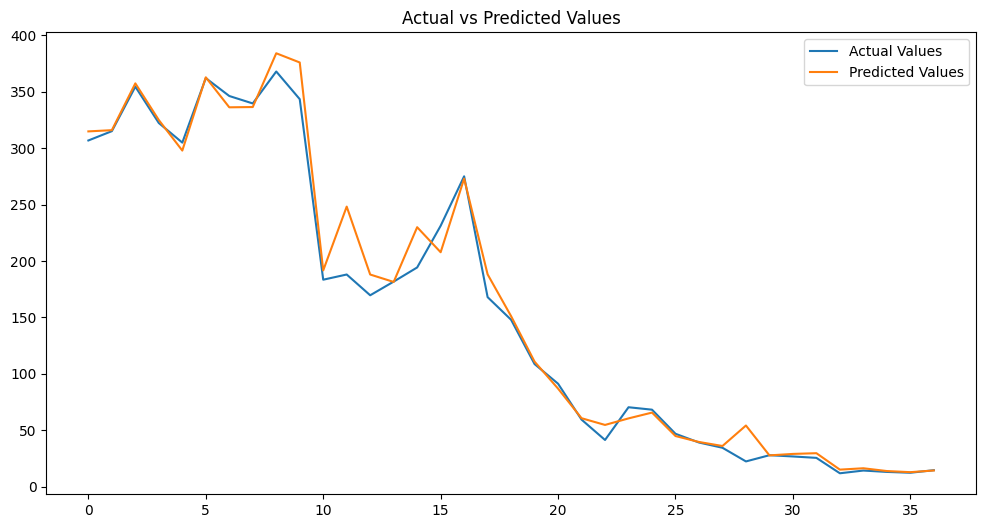

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Values')
plt.plot(pred4, label='Predicted Values')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()

## Evaluation comparison

Lets Compare the predicted values of all models vs the actual values

In [40]:
eval = pd.DataFrame(data = {"Expected": y_test})
eval["preds of model 1"] = pred1
eval["preds of model 2"] = pred2
eval["preds of model 3"] = pred3
eval["preds of model 4"] = pred4
eval

,Expected,preds of model 1,preds of model 2,preds of model 3,preds of model 4
148,306.80,311.568064,311.568984,321.9444,314.844122
149,315.05,311.639220,311.639502,320.8409,315.925725
150,354.45,353.230619,353.229068,335.5247,357.391490
151,322.25,325.249260,325.251854,333.9552,324.892481
152,304.90,297.738533,297.740343,308.6882,297.853885
153,362.05,357.386401,357.384127,336.0742,362.750450
154,346.20,335.173958,335.176332,342.6779,336.176829
155,339.60,334.106120,334.107506,343.5416,336.423031
156,367.90,378.453146,378.451880,346.5962,384.050510
157,343.40,372.479331,372.480316,346.3143,375.905636


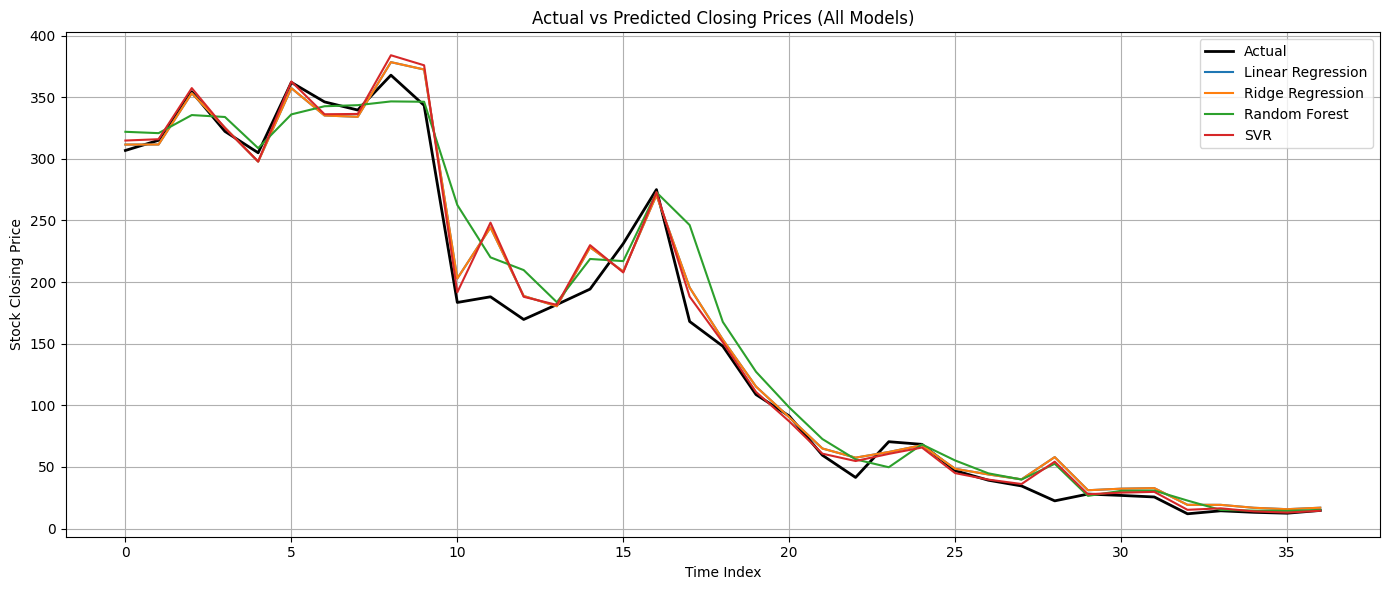

In [41]:
plt.figure(figsize=(14, 6))

plt.plot(eval['Expected'].values, label='Actual', color='black', linewidth=2)
plt.plot(eval["preds of model 1"].values, label='Linear Regression')
plt.plot(eval["preds of model 2"].values, label='Ridge Regression')
plt.plot(eval["preds of model 3"].values, label='Random Forest')
plt.plot(eval["preds of model 4"].values, label='SVR')

plt.title('Actual vs Predicted Closing Prices (All Models)')
plt.xlabel('Time Index')
plt.ylabel('Stock Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Evaluation metrics used

We have used 3 parameters to evaluate and compare the performance of each model to get the most accurate output. The evaluation metreics are:
1. Score(R^2)
2. MAE (Mean Absolute Error) = The Average of the absolute differncence of the actual and predicted value
3. MSE (Mean Square Error) = Square of the difference between the actual and predicted value

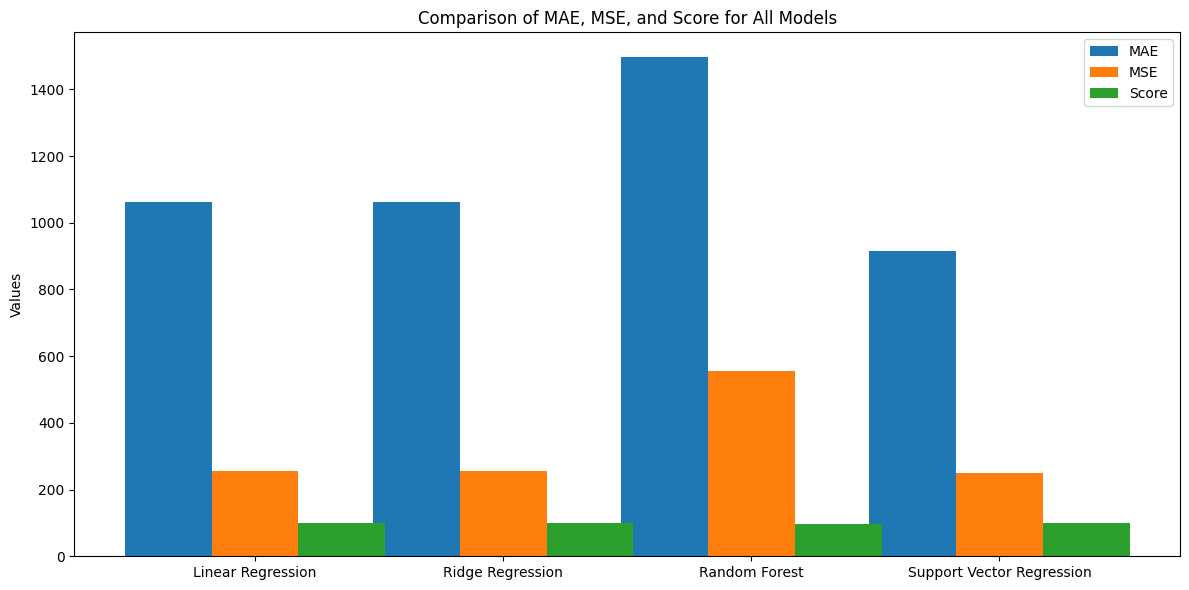

In [42]:
#Plotting the values

model_names = ['Linear Regression', 'Ridge Regression', 'Random Forest', 'Support Vector Regression']
mae_values = [mae1*100, mae2*100, mae3*100, mae4*100]
mse_values = [mse1, mse2, mse3, mse4]

scores = [
    model.score(x_test, y_test)*100,
    model2.score(x_test, y_test)*100,
    model3.score(x_test, y_test)* 100,
    model4.score(x_test, y_test)* 100
]

x = np.arange(len(model_names))
width = 0.35
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width, mae_values, width, label='MAE')
bar2 = ax.bar(x, mse_values, width, label='MSE')
bar3 = ax.bar(x + width, scores, width, label='Score')

# Add some text and formatting
ax.set_ylabel('Values')
ax.set_title('Comparison of MAE, MSE, and Score for All Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

plt.tight_layout()
plt.show()

## Saving our model

In [43]:
import pickle

# Saving the best model (in this case, SVR) to a file for future use
pickle.dump(model4, open('best_model.pkl', 'wb'))

## Loading it again

In [44]:
loaded_model = pickle.load(open('best_model.pkl', 'rb'))

loaded_model.score(x_test, y_test)

0.9848740068172164

###  **Final Conclusion**

After evaluating the performance of four regression models—**Linear Regression**, **Ridge Regression**, **Random Forest Regressor**, and **Support Vector Regressor (SVR)**—on the Yes Bank stock price dataset, we can draw a clear conclusion based on the **MAE, MSE, and R² Score** metrics.

From the **bar graph**:

* **MAE (Mean Absolute Error)** and **MSE (Mean Squared Error)** are **lowest for SVR**, indicating that its predictions are closest to the actual values on average.
* Although all models achieved **similar R² scores**, the **error metrics** are crucial for determining how far predictions deviate in real monetary terms.
* **Random Forest**, despite being a complex ensemble model, had **the highest error**, suggesting overfitting or poor generalization on this dataset.
* **Linear and Ridge Regression** performed reasonably well and were consistent in both MAE and MSE, but not better than SVR.

---

###  **Key Takeaways:**

* **Support Vector Regression (SVR)** is the **most reliable model** in this context. It achieved the **best trade-off** between bias and variance and delivered the **most accurate closing price predictions**.
* While **linear models** were simpler and interpretable, they lacked the flexibility needed to capture subtle patterns in the data.
* **Random Forest**, despite its popularity, was not effective for this particular time-series-like tabular data—possibly due to its inability to extrapolate or due to the small dataset size.

---

###  Final Verdict:

 **SVR should be chosen as the optimal model for predicting Yes Bank's monthly stock closing prices**, due to its superior accuracy in both absolute and squared error metrics, while maintaining a competitive R² score.


